# Principal Component Analysis with Cancer Data

In [4]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [205]:
cancer = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [174]:
cancer.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [30]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

#### Shape of the dataset

In [175]:
cancer.shape

(699, 11)

#### 5 point summary

In [176]:
cancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


#### Datatype of the columns

In [177]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


##### Bare Nuclei is Object datatype. Reamining all the columns are int.

In [178]:
#Checking values stored in the dataframe
for column in cancer.columns:
    print("FEATURE NAME & VALUES = %s - %s"%(column, cancer[column].unique()[:10]))

FEATURE NAME & VALUES = ID - [1000025 1002945 1015425 1016277 1017023 1017122 1018099 1018561 1033078
 1035283]
FEATURE NAME & VALUES = ClumpThickness - [ 5  3  6  4  8  1  2  7 10  9]
FEATURE NAME & VALUES = Cell Size - [ 1  4  8 10  2  3  7  5  6  9]
FEATURE NAME & VALUES = Cell Shape - [ 1  4  8 10  2  3  5  6  7  9]
FEATURE NAME & VALUES = Marginal Adhesion - [ 1  5  3  8 10  4  6  2  9  7]
FEATURE NAME & VALUES = Single Epithelial Cell Size - [ 2  7  3  1  6  4  5  8 10  9]
FEATURE NAME & VALUES = Bare Nuclei - ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8']
FEATURE NAME & VALUES = Normal Nucleoli - [ 3  9  1  2  4  5  7  8  6 10]
FEATURE NAME & VALUES = Bland Chromatin - [ 1  2  7  4  5  3 10  6  9  8]
FEATURE NAME & VALUES = Mitoses - [ 1  5  4  2  3  7 10  8  6]
FEATURE NAME & VALUES = Class - [2 4]


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [179]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

cancer.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

#### No null value is present

In [180]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
countQuestionmark = (cancer['Bare Nuclei']=='?').sum()
print("Total Number of Question Marks in Bare Nuclei feature :",countQuestionmark)

Total Number of Question Marks in Bare Nuclei feature : 16


In [206]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

#### Replacing the ? with the top value

In [207]:
top=cancer['Bare Nuclei'].describe().top
top = int(top)
print(top)
cancer = cancer.replace('?',top)

1


#### Converting the object datatype to numeric

In [208]:
for feature in cancer.columns: # Loop through all columns in the dataframe
    if cancer[feature].dtype == 'object': # Only apply for columns with categorical strings
        cancer[feature] = pd.Categorical(cancer[feature]).codes # Replace strings with an integer
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int8
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), int8(1)
memory usage: 55.4 KB


#### Finding the duplicates

In [209]:
cancer.duplicated(subset=None, keep='first').value_counts()

False    691
True       8
dtype: int64

#### Removing duplicates value 

In [210]:
cancer.drop_duplicates(keep='first', inplace=True)
cancer.shape

(691, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

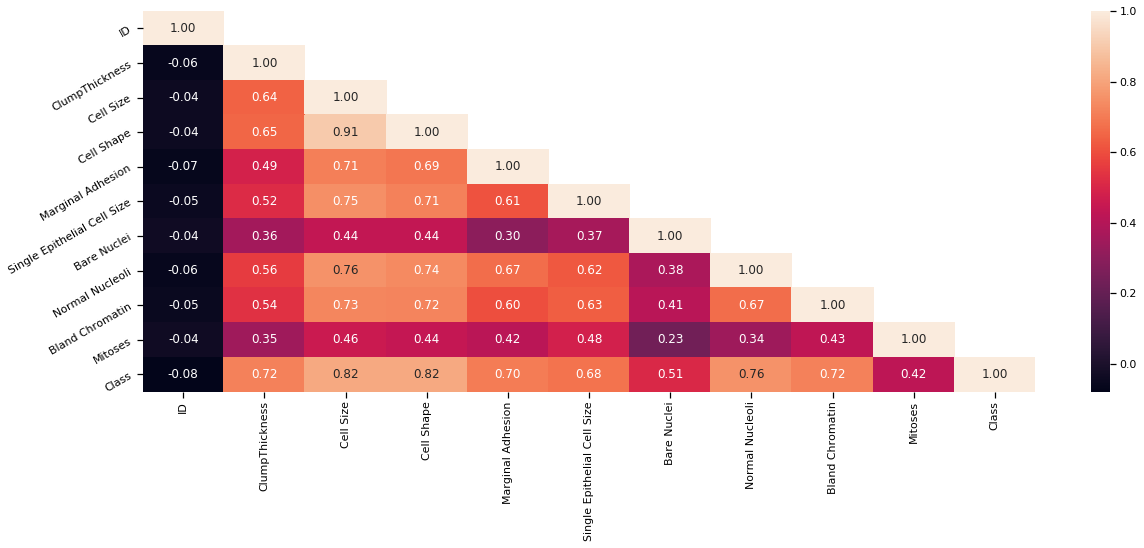

In [157]:
#Graphical representation of correlations between features
corr = cancer.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
### and bland chromatin
### Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

### pair plot

C:\Users\arupm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\arupm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


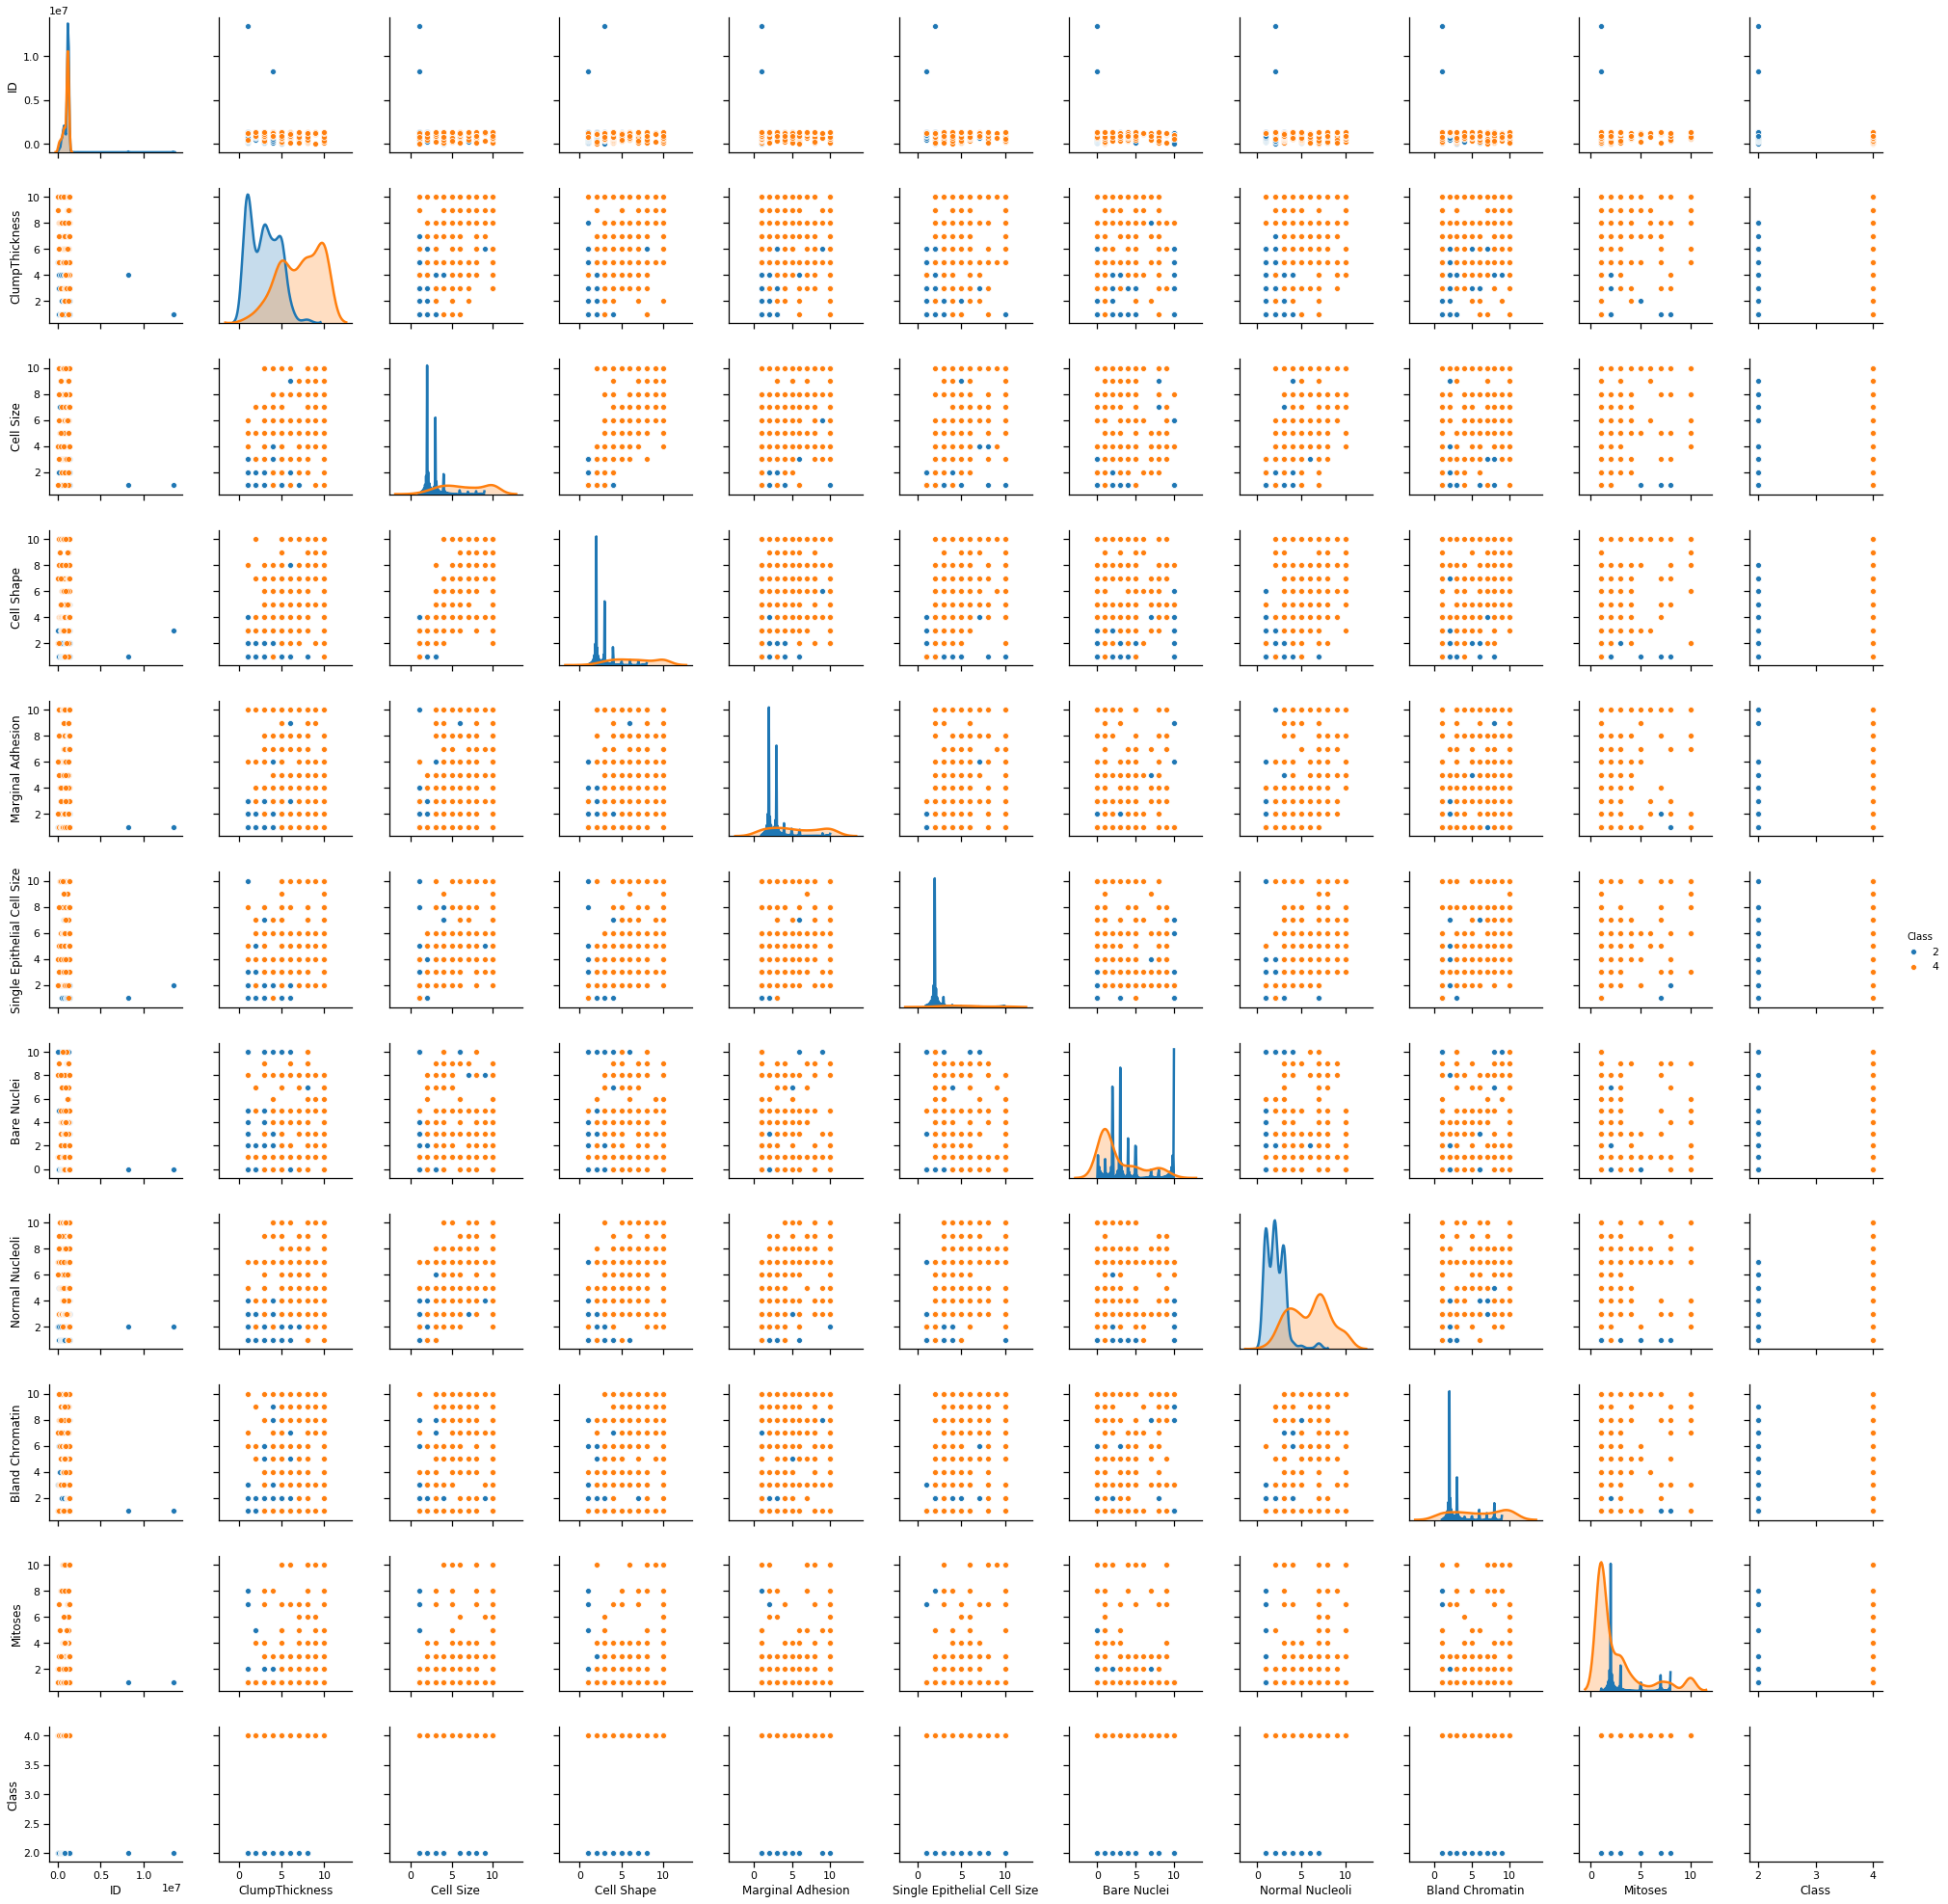

In [127]:
sns.pairplot(cancer,diag_kind='kde',hue='Class')

### Relationship between variables shows come correlation. 
### Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
### Between 1 to 10

### most of the features are right skewed

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [142]:
cancer.skew()

ID                             13.683661
ClumpThickness                  0.591503
Cell Size                       1.233241
Cell Shape                      1.163698
Marginal Adhesion               1.507563
Single Epithelial Cell Size     1.719041
Bare Nuclei                     2.098839
Normal Nucleoli                 1.102753
Bland Chromatin                 1.407485
Mitoses                         3.544555
Class                           0.656214
dtype: float64

### Removing columns


In [216]:
cancer.drop(['ID'],axis=1,inplace=True)

In [217]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null int8
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: int64(9), int8(1)
memory usage: 54.7 KB


In [219]:
list(cancer.columns)

['ClumpThickness',
 'Cell Size',
 'Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Normal Nucleoli',
 'Bland Chromatin',
 'Mitoses',
 'Class']

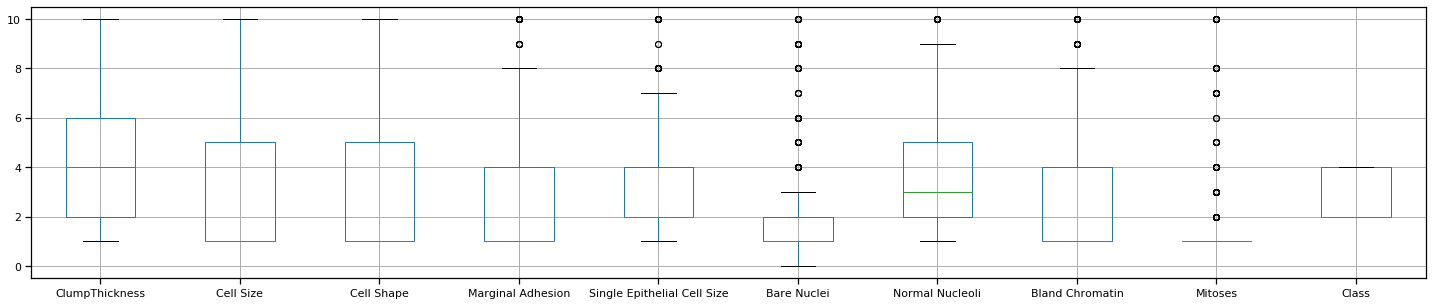

In [233]:
cancer.boxplot(figsize=(25,5),column=list(cancer.columns))

In [230]:
pd.crosstab(cancer["Marginal Adhesion"],cancer["Class"])

Class,2,4
Marginal Adhesion,,
1,370,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [249]:
cancer['Marginal Adhesion']=np.where(cancer['Marginal Adhesion']>4,4,cancer['Marginal Adhesion'])

In [248]:
cancer['Single Epithelial Cell Size']=np.where(cancer['Single Epithelial Cell Size']>4,4,cancer['Single Epithelial Cell Size'])

In [246]:
cancer['Bare Nuclei']=np.where(cancer['Bare Nuclei']>2,2,cancer['Bare Nuclei'])

In [245]:
cancer['Normal Nucleoli']=np.where(cancer['Normal Nucleoli']>5,5,cancer['Normal Nucleoli'])

In [244]:
cancer['Bland Chromatin']=np.where(cancer['Bland Chromatin']>4,4,cancer['Bland Chromatin'])

In [251]:
cancer['Mitoses']=np.where(cancer['Mitoses']>1,1,cancer['Mitoses'])

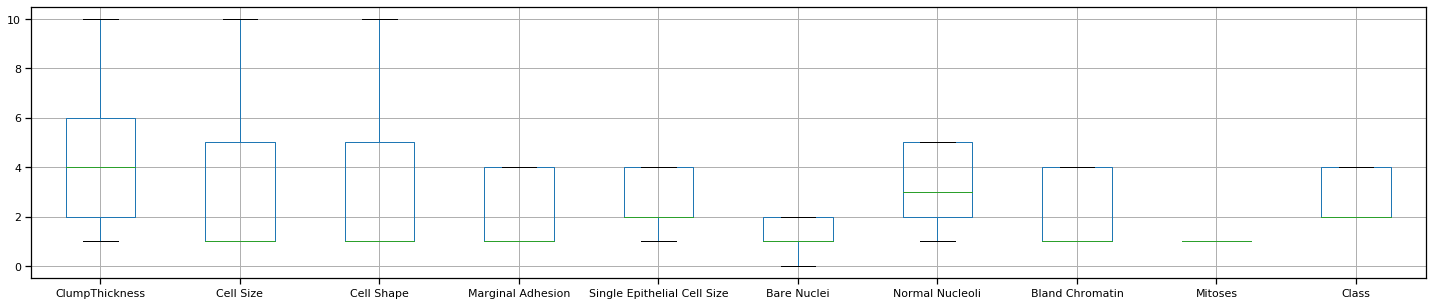

In [252]:
cancer.boxplot(figsize=(25,5),column=list(cancer.columns))

#### dropping class column

In [320]:
cancer_df= cancer.drop(['Class'],axis=True)
cancer_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,4,2,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,2,3,4,1
4,4,1,1,3,2,1,3,1,1


# Q6 Create a covariance matrix for identifying Principal components

In [321]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(cancer_df.T)
print(cov_matrix)

[[7.9290715  5.5095325  5.44878039 2.02051847 1.58255626 0.82195306
  2.38511085 2.10486587 0.        ]
 [5.5095325  9.24967806 8.15057363 2.8475765  2.26318715 1.01141383
  3.20911512 2.88782693 0.        ]
 [5.44878039 8.15057363 8.76092619 2.7031733  2.1384425  0.9685459
  3.05926299 2.78065186 0.        ]
 [2.02051847 2.8475765  2.7031733  1.68533736 0.86907234 0.42983704
  1.24207093 1.10805805 0.        ]
 [1.58255626 2.26318715 2.1384425  0.86907234 0.9285933  0.32542629
  0.95778854 0.91088949 0.        ]
 [0.82195306 1.01141383 0.9685459  0.42983704 0.32542629 0.28211582
  0.47964303 0.4207303  0.        ]
 [2.38511085 3.20911512 3.05926299 1.24207093 0.95778854 0.47964303
  2.1680698  1.3204115  0.        ]
 [2.10486587 2.88782693 2.78065186 1.10805805 0.91088949 0.4207303
  1.3204115  1.71061474 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [322]:
# Step 2- Get eigen values and eigen vector

In [323]:
from numpy import linalg as LA
eigval,eigenvec=LA.eig(cov_matrix)
print('Eigen Value: ',eigval)
print('Eigen Vector: ',eigenvec)

Eigen Value:  [25.4891804   3.559831    1.18435865  0.13161801  0.27743817  0.83938091
  0.57596583  0.65663379  0.        ]
Eigen Vector:  [[ 4.47828247e-01  8.87663907e-01 -9.45831018e-02 -2.40863094e-02
  -1.12778844e-02  4.27224875e-02  3.22489329e-03  3.70611484e-03
   0.00000000e+00]
 [ 5.73079170e-01 -3.39852306e-01 -1.39596005e-01  4.31153134e-03
  -7.81945861e-02  7.18403312e-01 -2.33737321e-02  1.17520202e-01
   0.00000000e+00]
 [ 5.56432407e-01 -2.92688972e-01 -4.07579459e-01 -3.14332103e-04
  -9.65060012e-03 -6.60005881e-01  5.35556357e-02 -5.09164779e-03
   0.00000000e+00]
 [ 1.98038204e-01 -6.23147826e-02  3.85824341e-01 -8.62910523e-02
  -1.80935667e-01  3.75363546e-03  4.81694896e-01 -7.31990022e-01
   0.00000000e+00]
 [ 1.54489039e-01 -4.97141810e-02  1.89871483e-01 -1.59300233e-01
   9.36369184e-01  1.28574186e-02 -1.19349894e-01 -1.45041145e-01
   0.00000000e+00]
 [ 7.20728089e-02  5.23493986e-03  1.17293400e-01  9.80758324e-01
   1.24432978e-01 -1.48005791e-02  1.27

# Q8 Find variance and cumulative variance by each eigen vector

In [324]:
tot = sum(eigval)
var_exp = [( i /tot ) * 100 for i in sorted(eigval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 77.91423693  88.79577613  92.41607303  94.98185672  96.98902683
  98.74961456  99.5976757  100.         100.        ]


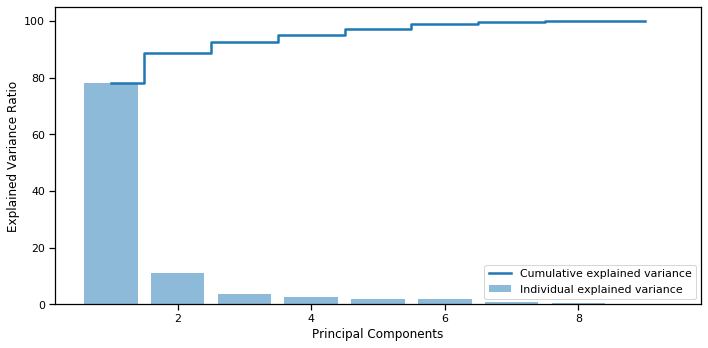

In [325]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigval.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigval.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [330]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(cancer_df)
cancer_pca= pca.transform(cancer_df)


In [331]:
cancer_pca.shape

(691, 4)

In [332]:
print(pca.components_)

[[ 0.44782825  0.57307917  0.55643241  0.1980382   0.15448904  0.07207281
   0.2275411   0.20336584 -0.        ]
 [ 0.88766391 -0.33985231 -0.29268897 -0.06231478 -0.04971418  0.00523494
  -0.04282326 -0.05167685 -0.        ]
 [-0.0945831  -0.139596   -0.40757946  0.38582434  0.18987148  0.1172934
   0.65301112  0.42468002  0.        ]
 [ 0.04272249  0.71840331 -0.66000588  0.00375364  0.01285742 -0.01480058
  -0.17191984 -0.12848664  0.        ]]


In [333]:
print(pca.explained_variance_)

[25.4891804   3.559831    1.18435865  0.83938091]


# Q10 Find correlation between components and features

In [336]:
df_comp=pd.DataFrame(pca.components_,columns=list(cancer_df))

In [337]:
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.447828,0.573079,0.556432,0.198038,0.154489,0.072073,0.227541,0.203366,-0.0
1,0.887664,-0.339852,-0.292689,-0.062315,-0.049714,0.005235,-0.042823,-0.051677,-0.0
2,-0.094583,-0.139596,-0.407579,0.385824,0.189871,0.117293,0.653011,0.424680,0.0
3,0.042722,0.718403,-0.660006,0.003754,0.012857,-0.014801,-0.171920,-0.128487,0.0


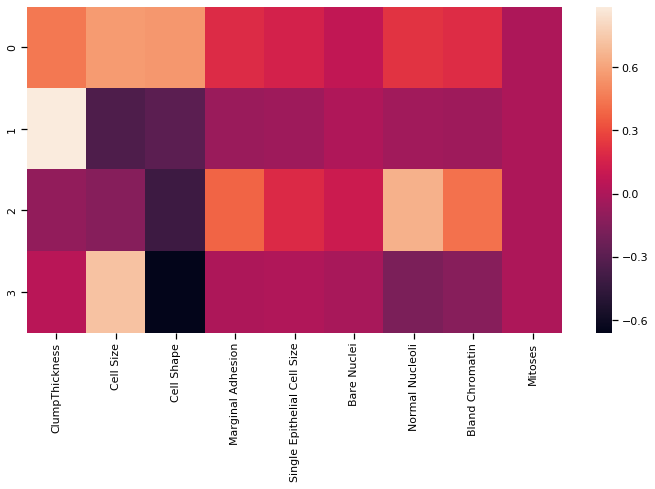

In [340]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [368]:
jokes=pd.read_csv("jokes.csv")

In [369]:
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [370]:
jokes.shape

(24983, 101)

In [346]:
jokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [371]:
jokes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumJokes,24983.0,72.467478,21.859600,36.00,53.000,72.00,100.00,100.0
Joke1,24983.0,34.401435,46.707059,-9.95,-0.150,5.05,99.00,99.0
Joke2,24983.0,27.094089,44.228006,-9.95,-2.180,3.69,99.00,99.0
Joke3,24983.0,33.263717,46.747535,-9.95,-1.145,4.66,99.00,99.0
Joke4,24983.0,36.244936,48.812967,-9.95,-3.350,3.45,99.00,99.0
Joke5,24983.0,0.427236,5.472657,-9.95,-3.690,1.12,4.47,99.0
Joke6,24983.0,19.342119,37.860770,-9.95,-0.390,3.54,8.01,99.0
Joke7,24983.0,-0.401803,5.741616,-9.95,-5.290,-0.05,3.93,99.0
Joke8,24983.0,-0.616110,5.008894,-9.95,-4.610,-0.29,3.06,99.0
Joke9,24983.0,36.228421,48.228364,-9.95,-1.775,4.03,99.00,99.0


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [377]:
ratings = jokes.iloc[0:200,:]
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [378]:
ratings.shape

(200, 101)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [390]:
ratings.replace(99.00,0, inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [395]:
jokes_df=ratings.drop(['NumJokes'],axis=1)

In [401]:
ratings_diff=jokes_df.mean()

In [402]:
print("Top 10 Jokes")
ratings_diff.sort_values(ascending=False).head(10)

Top 10 Jokes


Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64